<a href="https://colab.research.google.com/github/RELEBOHILE-PHEKO/alu-machine_learning/blob/main/Formative_3_Group_7_Exponential.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**PART 1- EXPONENTIAL DISTRIBUTION**

The Exponential Distribution is a **continuous probability distribution** used to model the **time between events** in a process that occurs randomly and independently at a constant average rate.

It is especially useful for modeling "time until" scenarios — like time until:
- The next customer arrives
- A machine breaks down
- A cyberattack happens (our scenario)

This distribution assumes:
- The events are memoryless (the past doesn’t affect the future)
- They occur at a constant rate, denoted by **λ (lambda)**


**Scenario: Cybersecurity Breach Detection**

You're working at a tech company’s cybersecurity team. On average, you detect 2 cyber-attacks per day. Your monitoring system is designed to alert you to suspicious activity in real-time.

In [ ]:
import math
import matplotlib.pyplot as plt

# Parameters
lambda_day = 2
lambda_hour = lambda_day / 24  # 0.0833 per hour
x = 6  # specific time in hours

# Time axis
x_vals = [i * 0.5 for i in range(0, 49)]  # 0 to 24 hours

# Functions
def pdf(lambd, x):
    return lambd * math.exp(-lambd * x)

def cdf(lambd, x):
    return 1 - math.exp(-lambd * x)

def survival(lambd, x):
    return math.exp(-lambd * x)

# Values for plotting
pdf_vals = [pdf(lambda_hour, t) for t in x_vals]
cdf_vals = [cdf(lambda_hour, t) for t in x_vals]
surv_vals = [survival(lambda_hour, t) for t in x_vals]

# Single-point values
pdf_6 = pdf(lambda_hour, x)
cdf_6 = cdf(lambda_hour, x)
surv_6 = survival(lambda_hour, x)


*This block sets everything up for my visualizations. I convert the daily rate to an hourly rate because I’m working in hours. Then I define my three core exponential functions: PDF, CDF, and Survival — and calculate them manually using math formulas, not any special stats libraries.
I also calculate the values at 6 hours, since that’s my example, and I’ll use those to point out key values in the graphs below.*

1. **Plot the PDF**

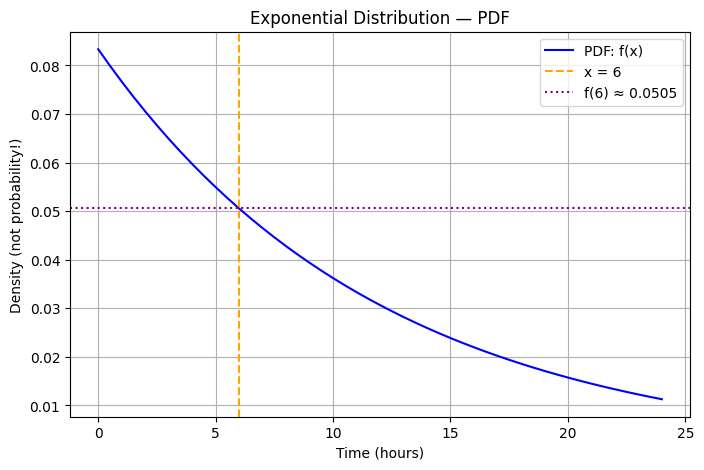

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(x_vals, pdf_vals, color='blue', label='PDF: f(x)')
plt.axvline(x=x, linestyle='--', color='orange', label='x = 6')
plt.axhline(y=pdf_6, linestyle=':', color='purple', label=f'f(6) ≈ {pdf_6:.4f}')
plt.title('Exponential Distribution — PDF')
plt.xlabel('Time (hours)')
plt.ylabel('Density (not probability!)')
plt.legend()
plt.grid(True)
plt.show()


. **PDF Graph (Probability Density Function)**
*This graph shows the PDF curve for the exponential distribution.
It’s not giving us probabilities, but instead it tells us the density — how likely the event is to happen around a certain time.
The curve starts high and drops off, which means that right after the process begins, the event is very likely to happen.*

**2. Plot the CDF**





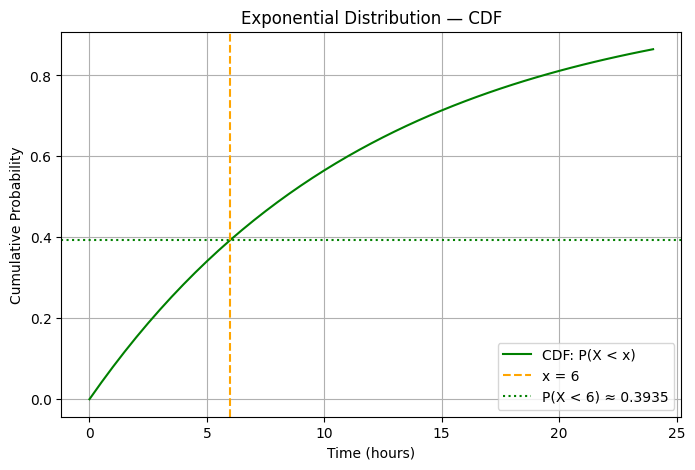

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(x_vals, cdf_vals, color='green', label='CDF: P(X < x)')
plt.axvline(x=x, linestyle='--', color='orange', label='x = 6')
plt.axhline(y=cdf_6, linestyle=':', color='green', label=f'P(X < 6) ≈ {cdf_6:.4f}')
plt.title('Exponential Distribution — CDF')
plt.xlabel('Time (hours)')
plt.ylabel('Cumulative Probability')
plt.legend()
plt.grid(True)
plt.show()


*This graph shows the CDF, which is the actual probability that the event has occurred by a certain time.
At 6 hours, the CDF is around 0.3935, meaning there’s a 39% chance the attack has already happened.
The curve starts at 0 and approaches 1, since the longer you wait, the more likely the event has occurred.*

3.**Plot the Survival Function**



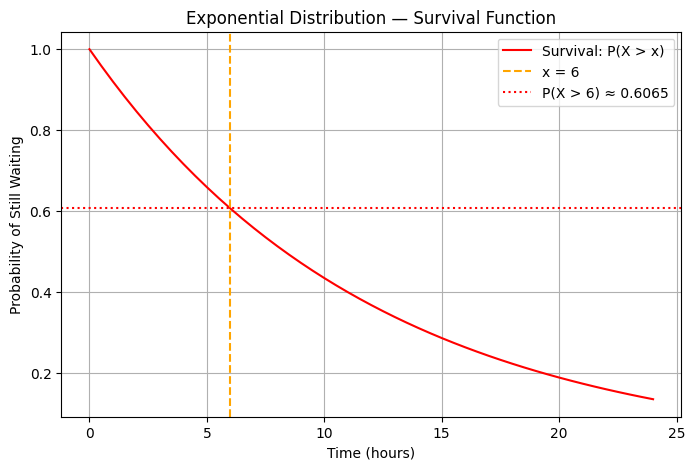

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(x_vals, surv_vals, color='red', linestyle='-', label='Survival: P(X > x)')
plt.axvline(x=x, linestyle='--', color='orange', label='x = 6')
plt.axhline(y=surv_6, linestyle=':', color='red', label=f'P(X > 6) ≈ {surv_6:.4f}')
plt.title('Exponential Distribution — Survival Function')
plt.xlabel('Time (hours)')
plt.ylabel('Probability of Still Waiting')
plt.legend()
plt.grid(True)
plt.show()


*This graph shows the Survival Function, which is just the opposite of the CDF — it tells us the chance the event hasn’t happened yet after x hours.
At 6 hours, it’s around 0.6065, so we have a 60% chance that no attack has occurred yet.
This is super useful when you’re trying to measure how long something will survive without breaking, failing, or triggering an event.*

### 🔁 Summary

In this Scenario, we  used the exponential distribution to model the time until a cyberattack happens. we explored the:
- PDF (likelihood of the event *around* a time),
- CDF (probability the event has occurred *by* a time), and
- Survival function (probability the event has *not yet* occurred).

These functions work together to give a full understanding of how timing affects probability in processes that happen randomly and continuously over time.


## Part 2: Bayesian Probability – Spam Filtering Scenario

### Real-World Scenario

In spam detection, certain keywords (like “free”) are more common in spam emails than in non-spam emails.

**Example**:  
- P(Spam) = 0.2 — Prior probability that any given email is spam  
- P(Not Spam) = 0.8

We observe:
- P(“free” | Spam) = 0.9 — Likelihood of "free" in spam  
- P(“free” | Not Spam) = 0.1 — Likelihood of "free" in non-spam

**Question**: Given an email contains the word “free”, what is the probability it is spam?

In [ ]:
# Bayesian probability for spam filtering

# Prior probabilities
P_spam = 0.2
P_not_spam = 0.8

# Likelihoods
P_free_given_spam = 0.9
P_free_given_not_spam = 0.1

# Evidence
P_free = (P_free_given_spam * P_spam) + (P_free_given_not_spam * P_not_spam)

# Posterior
P_spam_given_free = (P_free_given_spam * P_spam) / P_free

print("P('free'):", round(P_free, 4))
print("P(Spam | 'free'):", round(P_spam_given_free, 4))

P('free'): 0.26
P(Spam | 'free'): 0.6923


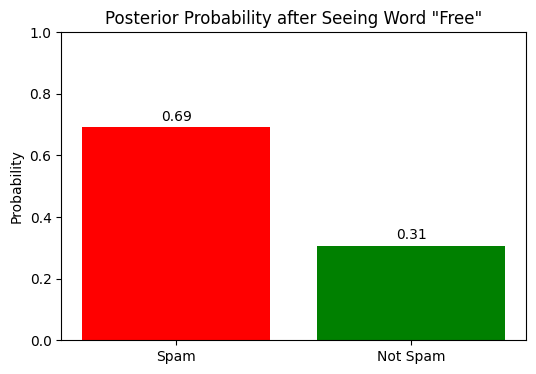

In [ ]:
import matplotlib.pyplot as plt

labels = ['Spam', 'Not Spam']
posterior_probs = [P_spam_given_free, 1 - P_spam_given_free]

plt.figure(figsize=(6, 4))
bars = plt.bar(labels, posterior_probs, color=['red', 'green'])

# Add value labels on each bar
for i in range(len(bars)):
    plt.text(i, posterior_probs[i] + 0.02, f"{posterior_probs[i]:.2f}", ha='center')

plt.title('Posterior Probability after Seeing Word "Free"')
plt.ylabel('Probability')
plt.ylim(0, 1)
plt.show()